In [27]:
from set_notebook_path import check_path
check_path()

'C:\\Users\\dkb73\\Desktop\\Fullstack\\terean-full-stack'

In [37]:
# General useful imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Used to manage 1D models
from backend.utils.utils import VelocityModel, get_geom_func_from_excel

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


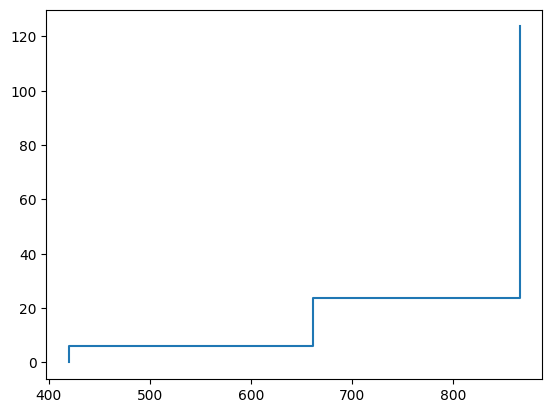

In [38]:
# The One Dimensional model
#A one dimensional model plots velocity vs depth at a specific point in the earth. It is represented as a series of layers with their associated velocities.

# Load a single model from the sample dir
example_1d_model = VelocityModel.from_file("SampleData/2D/S-Wave/SubArrays/Line4-55ft-model.txt")

# Plot the model
example_1d_model.plot_vel_model()

In [39]:
# This simple model has 3 layers, with increasing velocity as depth increases.
# The VelocityModel object also contains a pandas dataframe with the raw data
# This shows the exact thicknesses and s wave velocities of the model.
example_1d_model.df

,Start,Stop,Thickness,Density,Velocity
"[0.0, 6.2)",0.000,6.200,6.200,2.0,419.872
"[6.2, 23.678)",6.200,23.678,17.478,2.0,661.749
"[23.678, 123.678)",23.678,123.678,100.000,2.0,865.435


In [40]:
# A 2D model is a series of sequential 1D Models, that are plotted in a line with interpolation and smoothing between them. This generates a more complete view of the geology present.
# We can load an array of 1D models using this function
from backend.utils.utils import auto_find_model_files
example_s_wave_models, example_unit_str = auto_find_model_files("SampleData/2D/S-Wave/SubArrays")

# This finds all model files based on a regex of the file name, and extracts the expected units used.
# It also extracts their positions, and sets that as part of the VelocityModel object.
print(f"Found {len(example_s_wave_models)} models. Using unit {example_unit_str}.")

Found 13 models. Using unit ft.


In [41]:
# If elevation data is present, it can be read using this function (WIP)
from backend.utils.utils import get_geom_func_from_excel
elevation_func, peak_elevation = get_geom_func_from_excel("SampleData/2D/S-Wave/SampleGeometry.xlsx")

Calculated actual cuda in 0.005373716354370117


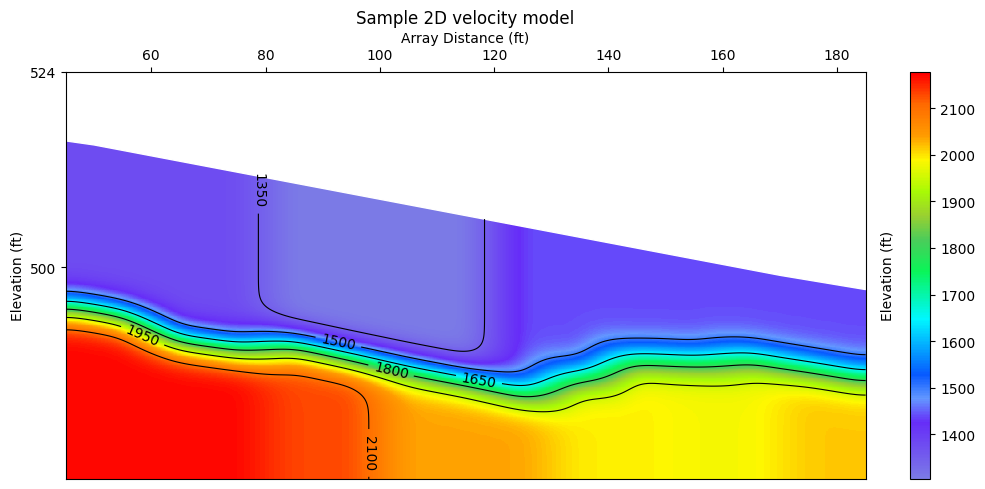

<Figure size 640x480 with 0 Axes>

In [42]:
# The 2d model can then be generated
from backend.utils.plotting_utils import plot_2d
_ = plot_2d(
    vel_models=example_s_wave_models,
    y_max=50,
    elevation_func=elevation_func,
    peak_elevation=peak_elevation,
    title="Sample 2D velocity model",
    x_label="Array Distance (ft)",
    y_label="Elevation (ft)",
    cbar_label="Elevation (ft)",
    contours=6,
    kernel_path="../cuda/2ds_array.cuda"
)